In [1]:
from pymoo.problems import get_problem
from tqdm import tqdm
import pandas as pd
from utils import *
from pymoo.vendor.vendor_coco import COCOProblem
import random
import os
from glob import glob
import pickle
import seaborn as sns

In [2]:
files = glob('runs/*')
dfs = Parallel(n_jobs=20)(delayed(lambda file: pd.read_csv(file, index_col=False))(file=file) for file in files)
df = pd.concat(dfs)
df

,GA,PSO,DE,CMAES,ES,algorithm_run,problem,instance,dim,n_eval,optimum,sample_y_min,sample_y_max
0,3.134076e+06,3.134072e+06,3.134072e+06,3.134072e+06,3.142336e+06,0,1,1,10,500,3.134072e+06,3.959376e+06,1.271352e+07
1,9.631065e+04,9.631031e+04,9.631031e+04,9.631031e+04,9.656394e+04,0,1,1,10,500,9.631031e+04,1.120515e+05,3.648104e+05
2,1.643399e+04,1.643393e+04,1.643393e+04,1.643393e+04,1.645683e+04,0,1,1,10,500,1.643393e+04,1.945617e+04,6.336404e+04
3,5.369384e+02,5.369354e+02,5.369354e+02,5.369354e+02,5.379030e+02,0,1,1,10,500,5.369354e+02,6.663765e+02,2.239358e+03
4,1.015250e+01,1.015248e+01,1.015248e+01,1.015248e+01,1.017499e+01,0,1,1,10,500,1.015248e+01,1.217321e+01,4.278062e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1.865130e+03,1.865129e+03,1.865129e+03,1.865129e+03,1.865141e+03,0,1,1,10,1000,1.865129e+03,2.206393e+03,7.769049e+03
995,3.247576e+06,3.247572e+06,3.247572e+06,3.247572e+06,3.247677e+06,0,1,1,10,1000,3.247572e+06,3.577137e+06,1.377302e+07
996,5.477332e-02,5.477329e-02,5.477329e-02,5.477329e-02,5.477425e-02,0,1,1,10,1000,5.477329e-02,6.651841e-02,2.444231e-01
997,2.912288e+00,2.912287e+00,2.912287e+00,2.912287e+00,2.912334e+00,0,1,1,10,1000,2.912287e+00,3.864721e+00,1.161359e+01


In [3]:
df['y_diff'] = df['sample_y_max'] - df['sample_y_min']
df['GA_diff'] =  df['GA']-df['optimum']
df['CMAES_diff'] = df['CMAES']-df['optimum']

In [4]:
df = df[df['problem'].isin([1, 2, 3, 4, 6, 8, 19])]

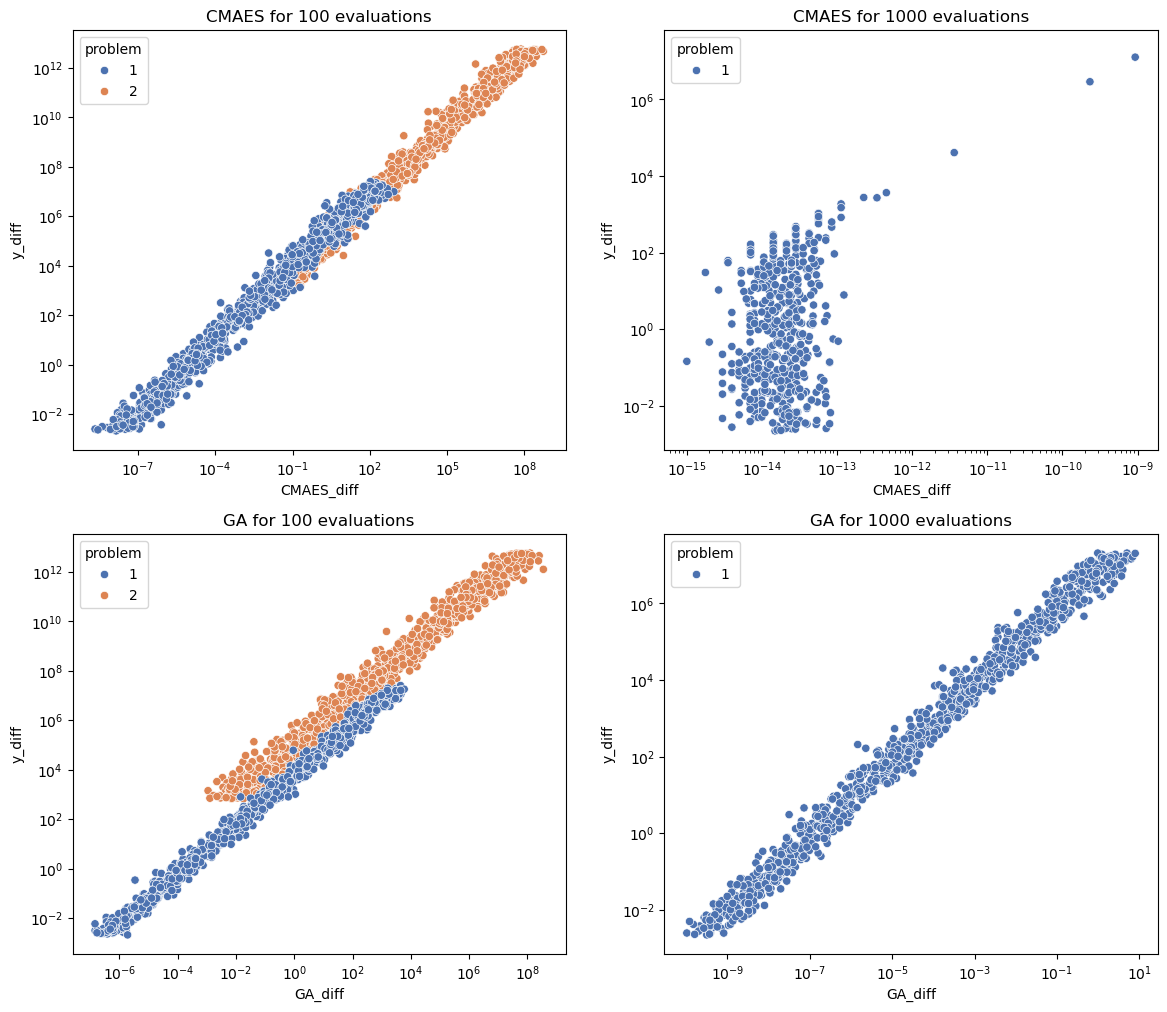

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: CMAES for 100 evaluations
sns.scatterplot(data=df.query("n_eval==100"), x='CMAES_diff', y='y_diff', hue='problem', palette="deep", ax=axes[0, 0])
axes[0, 0].set_xscale('log')
axes[0, 0].set_yscale('log')
axes[0, 0].set_title('CMAES for 100 evaluations')

# Plot 2: CMAES for 1000 evaluations
sns.scatterplot(data=df.query("n_eval==1000"), x='CMAES_diff', y='y_diff', hue='problem', palette="deep", ax=axes[0, 1])
axes[0, 1].set_xscale('log')
axes[0, 1].set_yscale('log')
axes[0, 1].set_title('CMAES for 1000 evaluations')

# Plot 3: GA for 100 evaluations
sns.scatterplot(data=df.query("n_eval==100"), x='GA_diff', y='y_diff', hue='problem', palette="deep", ax=axes[1, 0])
axes[1, 0].set_xscale('log')
axes[1, 0].set_yscale('log')
axes[1, 0].set_title('GA for 100 evaluations')

# Plot 4: GA for 1000 evaluations
sns.scatterplot(data=df.query("n_eval==1000"), x='GA_diff', y='y_diff', hue='problem', palette="deep", ax=axes[1, 1])
axes[1, 1].set_xscale('log')
axes[1, 1].set_yscale('log')
axes[1, 1].set_title('GA for 1000 evaluations')
plt.savefig(f'figures/types_of_errors.pdf', bbox_inches='tight', pad_inches=0)

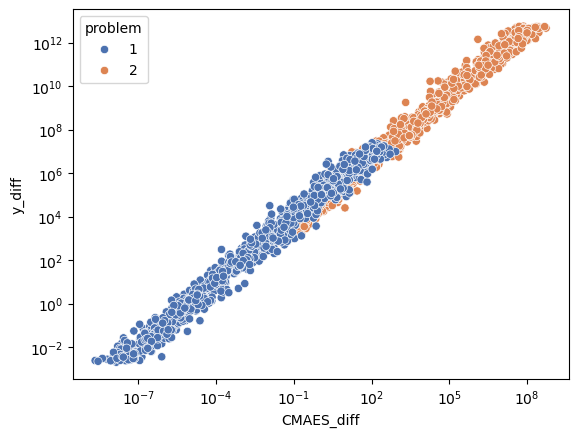

In [6]:
sns.scatterplot(data=df.query("n_eval==100"), x='CMAES_diff', y='y_diff', hue='problem', palette="deep")
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
#plt.savefig(f'figures/types_of_errors.pdf', bbox_inches='tight', pad_inches=0)

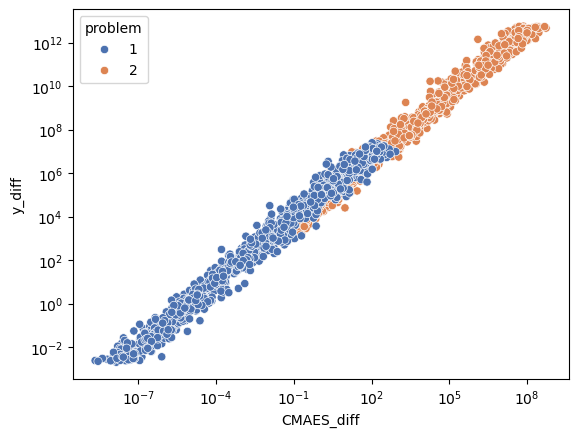

In [7]:
sns.scatterplot(data=df.query("n_eval==100"), x='CMAES_diff', y='y_diff', hue='problem', palette="deep")
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
#plt.savefig(f'figures/types_of_errors.pdf', bbox_inches='tight', pad_inches=0)

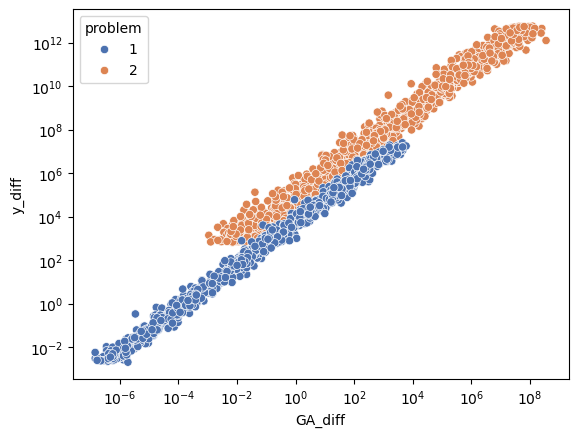

In [8]:
sns.scatterplot(data=df.query("n_eval==100"), x='GA_diff', y='y_diff', hue='problem', palette="deep")
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
plt.savefig(f'figures/types_of_errors.pdf', bbox_inches='tight', pad_inches=0)

In [9]:
#df['best_y'] = df['sample_y'].apply(lambda x: np.frombuffer(bytes(x, None)).min())

In [10]:
#np.fromstring(df['sample_y'].iloc[0].replace('\n', '').replace(' ', ''))

In [11]:
sdfsadf=afdasf

NameError: name 'afdasf' is not defined

In [ ]:
from threading import Lock

# Define a lock
problem_creation_lock = Lock()

def get_problem(typ, n_var, scale):
    with problem_creation_lock:  # Acquire the lock before creating the problem
        return ScaledCOCOProblem(typ, n_var=n_var, scale=scale)

In [ ]:
for n_evals in [100, 200, 500, 1000]:
    for coco_problem in range(1, 25):
        file = f'scale_correlations/pc_{coco_problem}__pi_{coco_instance}__nevals_{n_evals}.csv'
        if os.path.exists(file):
            print(f'Files {file} already exist.')
        else:
            df = {'problem_class': [], 'problem_instance': [], 'y_diff': [], 'ga_diff': [], 'cmaes_diff': [], 'n_evals': []}
            for run in tqdm(range(1, 1000)):
                scaled = get_scale()
                problem = get_problem(f"bbob-f{coco_problem}-{coco_instance}", n_var=dim, scale=scaled)
                data = run_algorithms(problem, n_runs=1, algorithms=['GA', 'CMAES'], n_eval=n_evals)
                sampling = LHS()
                X = sampling(problem, dim*n_samples).get("X")
                y = problem.evaluate(X).flatten()

                with problem_creation_lock:
                    y_diff = np.abs(np.min(y)-np.max(y))
                    ga_diff = data['GA'][0]-problem.evaluate(problem.pareto_set())[0][0]
                    cmaes_diff = data['CMAES'][0]-problem.evaluate(problem.pareto_set())[0][0]

                df['problem_class'].append(coco_problem)
                df['problem_instance'].append(coco_instance)
                df['y_diff'].append(y_diff)
                df['ga_diff'].append(ga_diff)
                df['cmaes_diff'].append(cmaes_diff)
                df['n_evals'].append(n_evals)
            df = pd.DataFrame(df)
            df.to_csv(file, index=False)

In [ ]:
#import os
#import pandas as pd
#from tqdm import tqdm
#from multiprocessing import Pool
#
## Define a function to process each combination of n_evals and coco_problem
#def process_combination(args):
#    n_evals, coco_problem = args
#    file = f'scale_correlations/pc_{coco_problem}__pi_{coco_instance}__nevals_{n_evals}.csv'
#    if os.path.exists(file):
#        print(f'Files {file} already exist.')
#    else:
#        df = {'problem_class': [], 'problem_instance': [], 'y_diff': [], 'ga_diff': [], 'cmaes_diff': [], 'n_evals': []}
#        for run in tqdm(range(1, 1000)):
#            scaled = get_scale()
#            problem = get_problem(f"bbob-f{coco_problem}-{coco_instance}", n_var=dim, scale=scaled)
#            data = run_algorithms(problem, n_runs=1, algorithms=['GA', 'CMAES'], n_eval=n_evals)
#            sampling = LHS()
#            X = sampling(problem, dim*n_samples).get("X")
#            y = problem.evaluate(X).flatten()
#
#            y_diff = np.abs(np.min(y)-np.max(y))
#            ga_diff = data['GA'][0]-problem.evaluate(problem.pareto_set())[0][0]
#            cmaes_diff = data['CMAES'][0]-problem.evaluate(problem.pareto_set())[0][0]
#
#            df['problem_class'].append(coco_problem)
#            df['problem_instance'].append(coco_instance)
#            df['y_diff'].append(y_diff)
#            df['ga_diff'].append(ga_diff)
#            df['cmaes_diff'].append(cmaes_diff)
#            df['n_evals'].append(n_evals)
#        df = pd.DataFrame(df)
#        df.to_csv(file, index=False)
#
## Define the range of n_evals and coco_problem
#n_evals_list = [100, 200, 500, 1000]
#coco_problem_range = range(1, 25)
#
## Generate combinations
#combinations = [(n_evals, coco_problem) for n_evals in n_evals_list for coco_problem in coco_problem_range]
#
## Initialize Pool with number of processes
#with Pool(processes=10) as pool:
#    pool.map(process_combination, combinations)

In [ ]:
df1 = pd.read_csv('scale_correlations/pc_5__pi_1__nevals_100.csv', index_col=False)
df2 = pd.read_csv('scale_correlations/pc_24__pi_1__nevals_100.csv', index_col=False)
df3 = pd.read_csv('scale_correlations/pc_24__pi_1__nevals_1000.csv', index_col=False)

df2

In [ ]:
import seaborn as sns
# Generate some synthetic data
#data1 = np.random.normal(loc=0, scale=1, size=100)
#data2 = np.random.normal(loc=5, scale=2, size=100)
#data_x = np.random.rand(100)
#data_y = data_x * 2 + np.random.normal(loc=0, scale=0.1, size=100)

# Create a 3x2 subplot grid
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

sns.scatterplot(x=df1['ga_diff'], y=df1['y_diff'], ax=axs[0, 0], color='red')
axs[0, 0].set(xscale="log", yscale="log")
sns.scatterplot(x=df1['cmaes_diff'], y=df1['y_diff'], ax=axs[0, 1], color='blue')
axs[0, 1].set(xscale="log", yscale="log")

sns.scatterplot(x=df2['ga_diff'], y=df2['y_diff'], ax=axs[1, 0], color='red')
axs[1, 0].set(xscale="log", yscale="log")
sns.scatterplot(x=df2['cmaes_diff'], y=df2['y_diff'], ax=axs[1, 1], color='blue')
axs[1, 1].set(xscale="log", yscale="log")


sns.scatterplot(x=df3['ga_diff'], y=df3['y_diff'], ax=axs[2, 0], color='red')
axs[2, 0].set(xscale="log", yscale="log")
sns.scatterplot(x=df3['cmaes_diff'], y=df3['y_diff'], ax=axs[2, 1], color='blue')
axs[2, 1].set(xscale="log", yscale="log")



#sns.histplot(data2, kde=True, ax=axs[0, 1], color='green')
#axs[0, 1].set_title('Histogram of Data2')

#sns.scatterplot(x=data_x, y=data_y, ax=axs[1, 0], color='red')
#axs[1, 0].set_title('Scatter Plot')

#sns.lineplot(x=data_x, y=data_y, ax=axs[1, 1])
#axs[1, 1].set_title('Line Plot')

#sns.boxplot(data=[data1, data2], ax=axs[2, 0])
#axs[2, 0].set_title('Box Plot')

#sns.violinplot(data=[data1, data2], ax=axs[2, 1])
#axs[2, 1].set_title('Violin Plot')

plt.tight_layout()
plt.show()

In [ ]:
df2 = pd.read_csv('scale_correlations/pc_1__pi_1__nevals_100.csv', index_col=False)
df1 = pd.read_csv('scale_correlations/pc_18__pi_1__nevals_100.csv', index_col=False)
df3 = pd.read_csv('scale_correlations/pc_24__pi_1__nevals_100.csv', index_col=False)

df_all = pd.concat([df1, df2, df3])
sns.scatterplot(data=df_all, x='cmaes_diff', y='y_diff', hue='problem_class')
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
plt.savefig(f'figures/types_of_errors.pdf', bbox_inches='tight', pad_inches=0)

In [ ]:
n_evals = 500
for coco_instance in [1, 2]:
    for coco_problem in range(1, 25):
        file = f'coco_scale/pc_{coco_problem}__pi_{coco_instance}__nevals_{n_evals}.csv'
        if os.path.exists(file):
            print(f'Files {file} already exist.')
        else:
            df = {'problem_class': [], 'problem_instance': [], 'y_diff': [], 'ga_diff': [], 'cmaes_diff': [], 'n_evals': []}
            for run in tqdm(range(1, 100)):
                problem = COCOProblem(f"bbob-f{coco_problem}-{coco_instance}", n_var=dim)
                data = run_algorithms(problem, n_runs=1, algorithms=['GA', 'CMAES'], n_eval=n_evals)
                sampling = LHS()
                X = sampling(problem, dim*n_samples).get("X")
                y = problem.evaluate(X).flatten()

                y_diff = np.abs(np.min(y)-np.max(y))
                ga_diff = data['GA'][0]-problem.evaluate(problem.pareto_set())[0][0]
                cmaes_diff = data['CMAES'][0]-problem.evaluate(problem.pareto_set())[0][0]

                df['problem_class'].append(coco_problem)
                df['problem_instance'].append(coco_instance)
                df['y_diff'].append(y_diff)
                df['ga_diff'].append(ga_diff)
                df['cmaes_diff'].append(cmaes_diff)
                df['n_evals'].append(n_evals)
            df = pd.DataFrame(df)
            df.to_csv(file, index=False)

In [ ]:
from glob import glob

In [ ]:
files = glob('coco_scale/*')
dfs = Parallel(n_jobs=20)(delayed(lambda file: pd.read_csv(file, index_col=False))(file=file) for file in files)
df = pd.concat(dfs)
df

In [ ]:
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sns.stripplot(x='problem_class', y='y_diff', data=df, hue='problem_instance')

In [ ]:
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sns.stripplot(x='problem_class', y='ga_diff', data=df, hue='problem_instance')
plt.grid()

In [ ]:
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sns.stripplot(x='problem_class', y='cmaes_diff', data=df, hue='problem_instance')
plt.grid()

In [ ]:
#from functools import lru_cache
#@lru_cache(maxsize=None)
#def get_ranges(coco_problem, coco_instance):
#    problem = COCOProblem(f"bbob-f{coco_problem}-{coco_instance}", n_var=dim)
#    sampling = LHS()
#    X = sampling(problem, dim*n_samples).get("X")
#    y = problem.evaluate(X).flatten()
#    y_diff = np.abs(np.min(y)-np.max(y))
#    return y_diff

In [ ]:
glob('')

In [ ]:
#data = {'problem_class': [], 'y_diff': []}
#for coco_problem in range(1, 25):
#    for coco_instance in range(1, 11):
#        y_diff = get_ranges(coco_problem, coco_instance)
#        print(coco_problem, y_diff)
#        data['problem_class'].append(coco_problem)
#        data['y_diff'].append(y_diff)
#        
#df = pd.DataFrame(data)

In [ ]:
df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(
    data=df, x="x_diff", y="problem_class", #hue="problem_class",
    #whis=[0, 100], width=.6, palette="vlag"
)

# Add in points to show each observation
sns.stripplot(df, x="x_diff", y="problem_class", size=4, color=".3")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)